# Finance Data Project 

In this data project I will focus on exploratory data analysis of stock prices. This project is not meant to be a robust financial analysis or be taken as financial advice.
____
I will focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

I will be using pandas to directly read data from Google finance.


*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*



In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pylab as plt
sns.set_style('whitegrid')
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Performing the following steps to collect data for all the banks**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

**  [Documentation](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) **
    
  

In [2]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2016,1,1)

In [12]:
BAC = data.DataReader("BAC", 'yahoo', start, end)
CG = data.DataReader("CG", 'yahoo', start, end)
GS=data.DataReader("GS",'yahoo', start, end)
JPM = data.DataReader("JPM", 'yahoo', start, end)
MS = data.DataReader("MS", 'yahoo', start, end)
WFC = data.DataReader("WFC", 'yahoo', start, end)

** Creating a list of the ticker symbols (as strings) in alphabetical order. **

In [5]:
ticker=["BAC","CG","GS","JPM","MS","WFC"]

** Using pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Setting the keys argument equal to the tickers list.**

In [14]:
bank_stocks=pd.concat([BAC,CG,GS,JPM,MS,WFC],axis=1,keys=ticker)

** Setting the column name levels. **

In [15]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [16]:
bank_stocks.head()


Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  37.157749  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  36.763119  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  36.810474  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  36.755238  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  36.778908  15619400   

Bank Ticker   CG                   ...            MS                        \
Stock Info  Open High Low Close    ...           Low      Close  Adj Close   
Date                               ...                                       
2006-01-03   NaN  NaN NaN   NaN    ...     56.740002  58.310001  40.062382   
2006-01-04   NaN  NaN NaN   NaN    ...     58.349998  58.349998  40.089870   
2006-01-05   NaN  NaN NaN   NaN    ...     58.020000  58.509998  40.199799   
2006-01-06   NaN  NaN NaN   NaN    ...     58.049999  58.570000  40.241035   
2006-01-09   NaN  NaN NaN   NaN    ...     58.619999  59.189999  40.666996   

Bank Ticker                 WFC                                              \
Stock Info    Volume       Open       High        Low      Close  Adj Close   
Date                                                                          
2006-01-03   5377000  31.600000  31.975000  31.195000  31.900000  23.077190   
2006-01-04   7977800  31.799999  31.820000  31.365000  31.530001  22.809519   
2006-01-05   5778000  31.500000  31.555000  31.309999  31.495001  22.784204   
2006-01-06   6889800  31.580000  31.775000  31.385000  31.680000  22.918036   
2006-01-09   4144500  31.674999  31.825001  31.555000  31.674999  22.914423   

Bank Ticker            
Stock Info     Volume  
Date                   
2006-01-03   11016400  
2006-01-04   10870000  
2006-01-05   10158000  
2006-01-06    8403800  
2006-01-09    5619600  

[5 rows x 36 columns]

# Exploratory Data Analysis

Documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [.xs method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).


** What is the max Close price for each bank's stock throughout the time period?**

In [17]:
bank_stocks.xs(key='Close',level='Stock Info',axis=1).max()


Bank Ticker
BAC     54.900002
CG      37.910000
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock, which is typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [18]:
returns=pd.DataFrame()

** Using pandas pct_change() method on the Close column to create a column representing this return value. Creating a for loop that goes and for each Bank Stock Ticker creates this returns column and sets it as a column in the returns DataFrame.**

In [19]:
for tick in ticker:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,CG Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,NaN,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,NaN,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,NaN,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,NaN,0.012030,0.016242,0.010586,-0.000158


** Creating a pairplot using seaborn of the returns dataframe. **

** OBSERVATION :
The CitiGroup stock seems a bit different as compared to the other stock. On googling, it was found that the CitiGroup faced an enormous crash. **

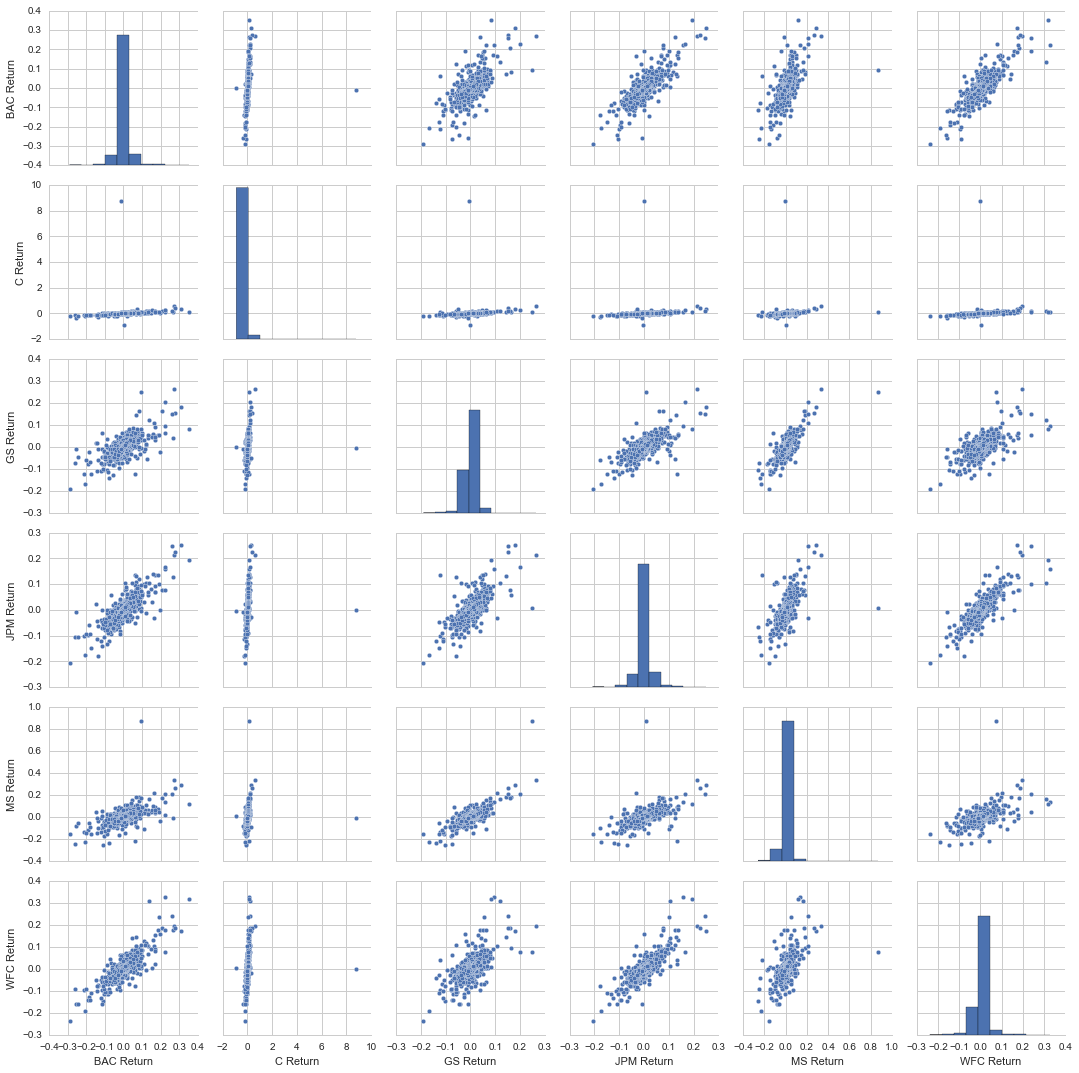

In [68]:
import seaborn as sns
sns.pairplot(returns[1:])

** Using this returns DataFrame, finding out on what dates each bank stock had the best and worst single day returns. **

** OBSERVATION:
Four of the banks share the same day for the worst drop. **

In [25]:
returns.idxmin()


BAC Return   2009-01-20
CG Return    2013-02-21
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [34]:
returns.idxmax()

BAC Return   2009-04-09
CG Return    2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Calculating the standard deviation of the returns, CitiGroup stock seems the riskiest for the year 2015?**

In [26]:
returns.std()

BAC Return    0.036647
CG Return     0.018727
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

** Creating a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


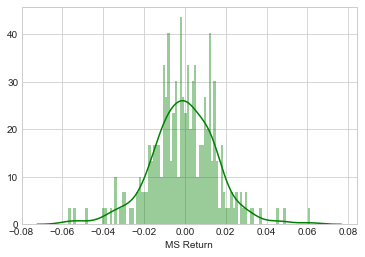

In [27]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

** Creating a distplot using seaborn of the 2008 returns for CitiGroup **

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



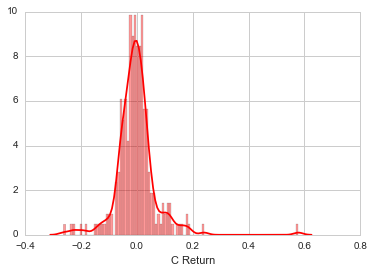

In [98]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['CG Return'],color='green',bins=100)

____
# More Visualization


### Imports

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


** Creating a line plot showing Close price for each bank for the entire index of time.  [.xs Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) **

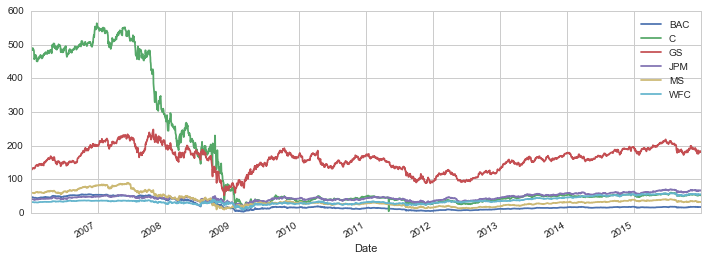

In [17]:
for tick in ticker:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

## Moving Averages
 

** Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



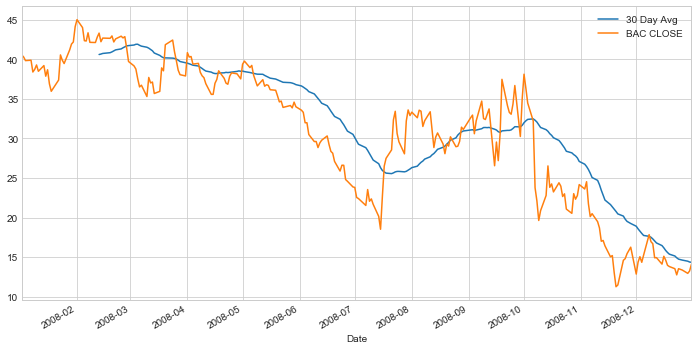

In [33]:
plt.figure(figsize=(12,6))
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Creating a heatmap of the correlation between the stocks Close Price.**

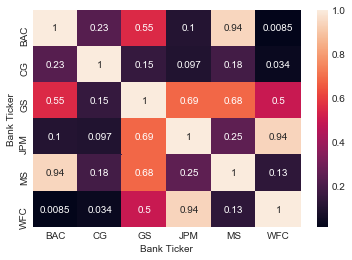

In [34]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Using seaborn's clustermap to cluster the correlations together:**

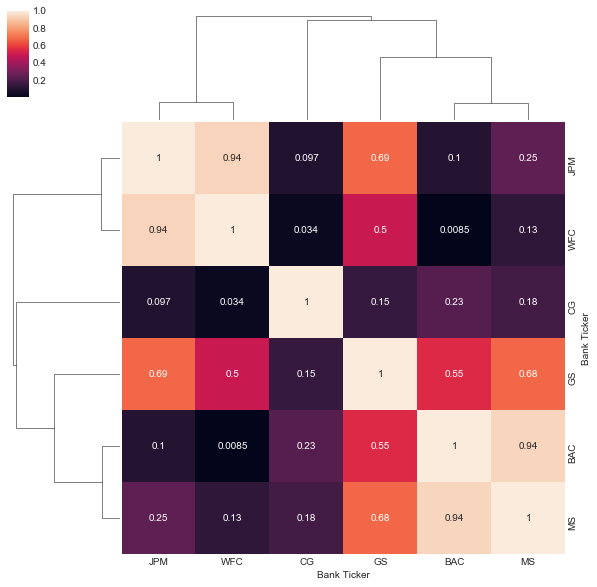

In [35]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)